In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")

In [9]:
from sklearn.model_selection import train_test_split

X, Y = df.drop("target", axis = 1), df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=0) 

### Scale Insensitive Models: Random Forest, Naive Bayes, GradientBoosting

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)

GaussianNB()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

### Scale Sensitive Models: KNN, Logistic Regression, Support Vector Machine

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # test seti olduğu için sadece transform kullanılır. Öbür türlü overfittinge yol açabilir.

# Y'leri scale etmeme sebebi modellerimizin sadece inputa odaklanmasıdır. Outputa odaklanmazlar.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [31]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train_scaled, Y_train)

LogisticRegression()

In [33]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_scaled, Y_train)

SVC()

##### Evaluation

In [36]:
forest.score(X_test,Y_test)

0.9926829268292683

In [40]:
nb_clf.score(X_test,Y_test)

0.8414634146341463

In [42]:
gb_clf.score(X_test,Y_test)

0.9707317073170731

In [44]:
knn.score(X_test_scaled,Y_test)

0.8512195121951219

In [46]:
log.score(X_test_scaled,Y_test)

0.8731707317073171

In [48]:
svc.score(X_test_scaled,Y_test)

0.9390243902439024

In [50]:
from sklearn.metrics import recall_score

Y_preds = forest.predict(X_test)
print("Forest Recall Score:", recall_score(Y_test, Y_preds))

Y_preds = nb_clf.predict(X_test)
print("Naive Bayes Recall Score:", recall_score(Y_test, Y_preds))

Y_preds = gb_clf.predict(X_test)
print("Gradient Boosting Recall Score:", recall_score(Y_test, Y_preds))

Y_preds = knn.predict(X_test_scaled)
print("KNN Recall Score:", recall_score(Y_test, Y_preds))

Y_preds = log.predict(X_test_scaled)
print("Log Recall Score:", recall_score(Y_test, Y_preds))

Y_preds = svc.predict(X_test_scaled)
print("SVC Recall Score:", recall_score(Y_test, Y_preds))

Forest Recall Score: 1.0
Naive Bayes Recall Score: 0.8597285067873304
Gradient Boosting Recall Score: 0.9728506787330317
KNN Recall Score: 0.8642533936651584
Log Recall Score: 0.9095022624434389
SVC Recall Score: 0.9230769230769231


C:\Users\Baran\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


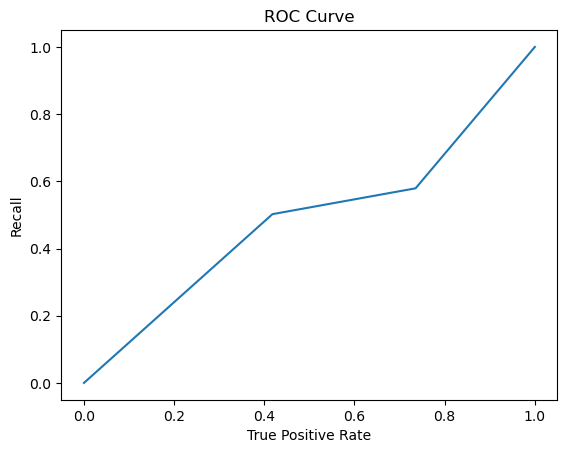

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
plt.plot(fpr,tpr)
plt.xlabel("True Positive Rate")
plt.ylabel("Recall")
plt.title("ROC Curve")
plt.show()

### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100,200,500],
    "max_depth": [None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features": ["sqrt" ,"log2", None]
}

forest = RandomForestClassifier(n_jobs=-1, random_state=0)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs= -1, verbose = 2)

In [57]:
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [59]:
best_forest = grid_search.best_estimator_

In [61]:
best_forest

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=0)

### Feature Importances

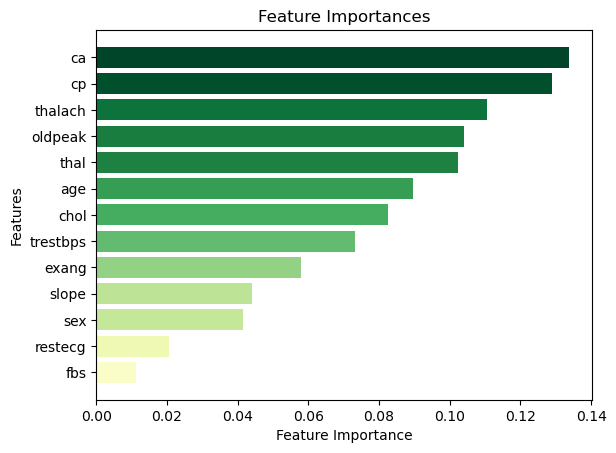

In [68]:
feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))
plt.barh(sorted_features,sorted_importances, color = colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [70]:
import seaborn as sns

<Axes: >

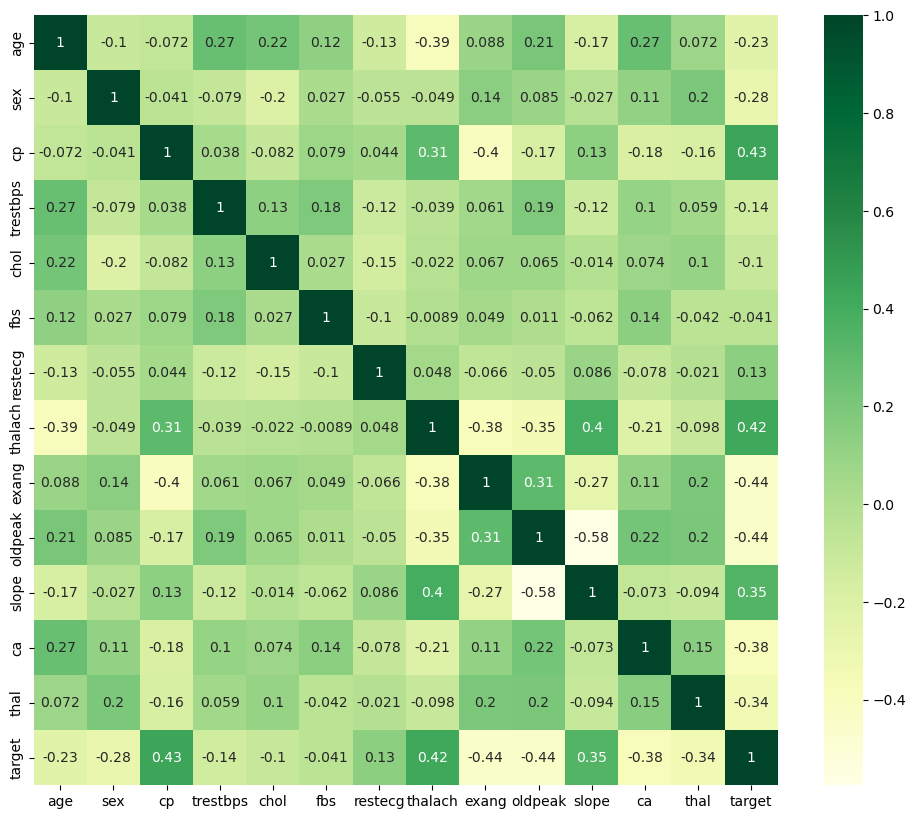

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot= True, cmap="YlGn")